# Homework 1

## Pair Programming Group Number: HW one pair 2
## Members of Team: Pamela Nguyen and Daniel Carlson


### Data maniupuation and Visualization!

In our first assignment you will practice manipuating and visualizing data from a real wold data set, Melbourne Australia home sales records. 

### The Data

Was taken from a Kaggle competition, and came with the following descriptions:
Content & Acknowledgements

```
This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

….Now with extra data including including property size, land size and council area, you may need to change your code!

Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory
```


## Q1 - Loading Data
Run the following code section to load dataset into a pandas DataFrame named `df`. If you need to look up other
syntax on how to read csv files you can find it [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [ ]:
# remember to type in your standard library import for pandas first
import pandas as pd
import numpy as np


url = 'https://gist.githubusercontent.com/TieJean/ba718aac753c2f90e3d4e040d8f7d982/raw/2aca4164b087fa86721e877b4f1a6bd46d687035/melb_data.csv'

#read the data from the URL 
df = pd.read_csv(url)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0



## Q2 - How many unique suburbs are there?

Are there any pandas DataFrame operations that can do this for you?

[This](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html) function might help. 

In [ ]:
# Returns the number of unique elements in the Suburbs series
unique_suburbs = df['Suburb'].nunique()
F'There are {unique_suburbs} unique suburbs'


'There are 314 unique suburbs'

## Q3 - How many unique properties are there?

If you forget the names of the columns you can always type:

`df.columns` 

in a cell by itself to see this list of column names.

In [ ]:
#df.columns
#unique_regions = df['Regionname'].nunique()
unique_regions = df[['Address','Lattitude','Longtitude']]
F'There are {unique_regions} unique properties/regions'

'There are                 Address  Lattitude  Longtitude\n0          85 Turner St  -37.79960   144.99840\n1       25 Bloomburg St  -37.80790   144.99340\n2          5 Charles St  -37.80930   144.99440\n3      40 Federation La  -37.79690   144.99690\n4           55a Park St  -37.80720   144.99410\n...                 ...        ...         ...\n13575      12 Strada Cr  -37.90562   145.16761\n13576     77 Merrett Dr  -37.85927   144.87904\n13577       83 Power St  -37.85274   144.88738\n13578      96 Verdon St  -37.85908   144.89299\n13579        6 Agnes St  -37.81188   144.88449\n\n[13580 rows x 3 columns] unique properties/regions'

## Q4 - What is the mean price of a property in the Kensington suburb?

You are getting the hang of reading the documentation!  Try finding the function
for mean yourself at the [root page](https://pandas.pydata.org/pandas-docs/stable/index.html) of the documentation.

In [ ]:
F'The mean price of a property in the Kensington suburb is '

kensington = df[df['Suburb'] == 'Kensington']
mean_price = kensington['Price'].mean()
F'The mean price of a property in Kensington is {mean_price}'



'The mean price of a property in Kensington is 831667.4358974359'

## Q5 - What percentage of properties contain a YearBuilt value?

In [ ]:
year_built = len(df['YearBuilt'].dropna())
tot = len(df['YearBuilt'])
percentage = (year_built / tot) * 100
F'The percentage of properties containing a YearBuilt value is {percentage}'

'The percentage of properties containing a YearBuilt value is 60.41973490427098'

## Q6 - Plot the Landsize as a histogram using 20 bins. Say something interesting about the graph.

Matplotlib is [here](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) to help. 

In data visualization we discuss the "Ink Ratio" of creating graphics.  If you use the definalt bin sizes of the matplotlib histogram function, you will find that the histogram is not very informative.  Use the documentation to guide you to adjust the width of the bins in the histogram to make one _really_ wide bin on the right, and the rest of the bins equally distributed where most of the data resides. 

count     13580.000000
mean        558.416127
std        3990.669241
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64


Text(0, 0.5, 'Counts')

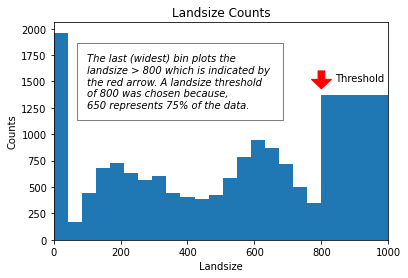

In [ ]:
import matplotlib.pyplot as plt

print(df['Landsize'].describe())
a = np.round(np.linspace(0,800,num=20))
a=np.append(a,4.5e4)
plt.hist(df['Landsize'], bins=a)
s='The last (widest) bin plots the \nlandsize > 800 which is indicated by \nthe red arrow. A landsize threshold \nof 800 was chosen because, \n650 represents 75% of the data.'
plt.text(100, 1250, s, style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},fontsize='medium')
#add arrow to plot
plt.arrow(x=800, y=1600, dx=0, dy=-80,color='red', width=20) 
#add annotation
plt.annotate('Threshold', xy = (840, 1500))

plt.xlim(0,1e3)
plt.title('Landsize Counts')
plt.xlabel('Landsize')
plt.ylabel('Counts')



## Q7 - Plot a scatter plot of price as a function of BuildingArea using only rows that have a valid BuildingArea value

Break this down into slicing the DataFrame first, then creating the visualization.  There are both `plot` and `scatter` functions in the matplotlib library that can help here.  You'll notice there is more than one way to do a thing so much in computer science 😄

If you have to change your axes and end up excluding some points to make the data more visible, then annotate the number of points excluded in the graph. 

             Suburb          Address  ...             Regionname Propertycount
1        Abbotsford  25 Bloomburg St  ...  Northern Metropolitan        4019.0
2        Abbotsford     5 Charles St  ...  Northern Metropolitan        4019.0
4        Abbotsford      55a Park St  ...  Northern Metropolitan        4019.0
6        Abbotsford     124 Yarra St  ...  Northern Metropolitan        4019.0
7        Abbotsford    98 Charles St  ...  Northern Metropolitan        4019.0
...             ...              ...  ...                    ...           ...
13572      Watsonia    76 Kenmare St  ...  Northern Metropolitan        2329.0
13573      Werribee      5 Nuragi Ct  ...   Western Metropolitan       16166.0
13576  Williamstown    77 Merrett Dr  ...   Western Metropolitan        6380.0
13578  Williamstown     96 Verdon St  ...   Western Metropolitan        6380.0
13579    Yarraville       6 Agnes St  ...   Western Metropolitan        6543.0

[7130 rows x 21 columns]


Text(550, 4000000, '26 data points\nare excluded')

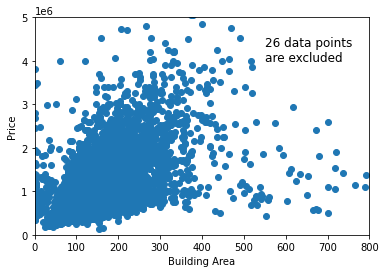

In [ ]:
import matplotlib.pyplot as plt

# Incorporates only rows with a valid BuildingArea
buildingArea = df[df['BuildingArea'].notna()] 
#print(buildingArea)
plt.scatter(buildingArea['BuildingArea'], buildingArea['Price'])
plt.xlabel('Building Area')
plt.ylabel('Price')
xmax = 800
ymax = 5000000
plt.xlim(0,xmax)
plt.ylim(0,ymax)

# Determines how many building were excluded from the xmax and ymax
xexclude = len(buildingArea[buildingArea['BuildingArea'] > xmax])
yexclude = len(buildingArea[buildingArea['Price'] > ymax])
xyexclude = len(buildingArea[(buildingArea['BuildingArea'] > xmax) & (buildingArea['Price'] > ymax)])
exclude = xexclude+yexclude-xyexclude
plt.annotate(f'{exclude} data points\nare excluded', (550,4000000), size=12)


## Q8 - List the top 10 SellerG, and what percentage of properties they have listed 

I'm going to assume that the SellerG column is the name of the seller group, so "realtor" in US parlance.  So, that column is interpreted as the seller that listed the property.

Check out the function `value_counts` in pandas documentation. 

In [ ]:
sellerCounts = df['SellerG'].value_counts()
totalSales = sellerCounts.sum()
topTen = sellerCounts.nlargest(10)
for i in range(0,topTen.size):
  pct = (topTen.iloc[i]/totalSales)*100
  topTen.replace(topTen.iloc[i], pct, inplace=True)
print(topTen)

Nelson           11.524300
Jellis            9.690722
hockingstuart     8.593520
Barry             7.444772
Ray               5.162003
Marshall          4.852725
Buxton            4.653903
Biggin            2.893962
Brad              2.518409
Woodards          2.216495
Name: SellerG, dtype: float64


## Q9 - Fix a problem
Your boss has told you that the number of rooms was calculated incorrectly systematically across the entire data set.  Add one room to the Rooms column using two methods:

 - a for loop, and
 - using a single statement
 
Save those DataFrames into the variables `df1` and `df2`.  (We don't use these again, for the next questions just continue using `df`)

Watch out that you don't accidentally change the original DataFrame using a shallow copy.

In [ ]:
#Make deep copies of df
df1 = df.copy()
df2 = df.copy()

#Iterating over rows
for i, row in df1.iterrows():
  df1.at[i, 'Rooms'] += 1

#Single statement
df2['Rooms'] = df2['Rooms']+1

print(df['Rooms'])
print(df1['Rooms'])
print(df2['Rooms'])

0        2
1        2
2        3
3        3
4        4
        ..
13575    4
13576    3
13577    3
13578    4
13579    4
Name: Rooms, Length: 13580, dtype: int64
0        3
1        3
2        4
3        4
4        5
        ..
13575    5
13576    4
13577    4
13578    5
13579    5
Name: Rooms, Length: 13580, dtype: int64
0        3
1        3
2        4
3        4
4        5
        ..
13575    5
13576    4
13577    4
13578    5
13579    5
Name: Rooms, Length: 13580, dtype: int64


## Q10- What is the Address of the earliest built house in the data set?

This will exercise your DataFrame slicing ability. 

In [ ]:
oldHouseIdx = df['YearBuilt'].idxmin()
print(df['Address'].iloc[oldHouseIdx])

5 Armstrong St


## Q11 - Save a file 

The council member for Melbourne has asked for the information for their district.  Assume that there are legal restrcitions and we can only provide the council member the Suburb, Price, and Date from the CouncilArea "Melbourne" to the council person.  Export the file with only the allowed columns, and do not write and index column.

The other half of `read_csv`, is `to_csv`.  Make sure you follow the documentation and only include the columns asked for in the output.

In [ ]:
dfMelbourne = df[df.CouncilArea == 'Melbourne']
dfMelbourne.to_csv(sep='\t' ,columns=('Suburb', 'Price', 'Date'), index=False)
print(dfMelbourne.to_csv(sep='\t' ,columns=('Suburb', 'Price', 'Date'), index=False))

Suburb	Price	Date
Flemington	957000.0	22/05/2016
Kensington	785000.0	3/09/2016
Kensington	852000.0	3/09/2016
Kensington	1037000.0	3/09/2016
Kensington	775000.0	3/12/2016
Kensington	1470000.0	4/03/2017
Kensington	630000.0	4/03/2017
Kensington	492500.0	4/06/2016
Kensington	420000.0	4/06/2016
Kensington	650000.0	4/06/2016
Kensington	1050000.0	4/06/2016
Kensington	1291000.0	6/08/2016
Kensington	420000.0	6/08/2016
Kensington	961000.0	7/05/2016
Kensington	1271000.0	7/05/2016
Kensington	1010000.0	7/05/2016
Kensington	750000.0	7/05/2016
Kensington	1675000.0	7/05/2016
Kensington	905000.0	8/10/2016
Kensington	960000.0	8/10/2016
Kensington	1031000.0	8/10/2016
Kensington	918000.0	8/10/2016
Kensington	870000.0	8/10/2016
Kensington	1165000.0	10/09/2016
Kensington	1710000.0	10/09/2016
Kensington	360000.0	10/12/2016
Kensington	1455000.0	10/12/2016
Kensington	365000.0	10/12/2016
Kensington	551000.0	10/12/2016
Kensington	442000.0	10/12/2016
Kensington	765000.0	10/12/2016
Kensington	515000.0	11/02/2017
K